In [ ]:
from sentence_transformers import SentenceTransformer
import json 

model = SentenceTransformer('all-MiniLM-L6-v2')
input_file = '../../Data/signal-descriptions/collated_descriptions.json'
def get_signal_embedding_sensory(signal):
    descriptions = signal['sensory_descriptions']
    desc_embeddings = model.encode(descriptions, normalize_embeddings=True)
    signal_vector = desc_embeddings.mean(axis=0)
    return signal_vector

def get_signal_embedding_emotional(signal):
    descriptions = signal['emotional_descriptions']
    desc_embeddings = model.encode(descriptions, normalize_embeddings=True)
    signal_vector = desc_embeddings.mean(axis=0)
    return signal_vector

def get_signal_embedding_associative(signal):
    descriptions = signal['associative_descriptions']
    desc_embeddings = model.encode(descriptions, normalize_embeddings=True)
    signal_vector = desc_embeddings.mean(axis=0)
    return signal_vector

output = []
with open(input_file, 'r') as f:
    signals = json.load(f)
    for signal in signals:
        sensory_embedding = get_signal_embedding_sensory(signal)
        emotional_embedding = get_signal_embedding_emotional(signal)
        metaphor_embedding = get_signal_embedding_associative(signal)
        output.append({
            'signal_index': signal['signal_index'],
            'sensory_embedding': sensory_embedding.tolist(),
            'emotional_embedding': emotional_embedding.tolist(),
            'metaphor_embedding': metaphor_embedding.tolist()})
    with open('signal_embeddings.json', 'w') as fl:
        json.dump(output, fl, indent=4)

In [ ]:
#MDS to 2 dimensions
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

with open('signal_embeddings.json', 'r') as f:
    output = json.load(f)

embeddings = output

signal_indexes = [signal['signal_index'] for signal in output]
sensory_embeddings = [signal['sensory_embedding'] for signal in output]
emotional_embeddings = [signal['emotional_embedding'] for signal in output]
metaphor_embeddings = [signal['metaphor_embedding'] for signal in output]

mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)
sensory_mds = mds.fit_transform(sensory_embeddings)
emotional_mds = mds.fit_transform(emotional_embeddings)
metaphor_mds = mds.fit_transform(metaphor_embeddings)

op = []
for i in range(len(signal_indexes)):
    op.append({
        'signal_index': signal_indexes[i],
        'sensory_mds': sensory_mds[i].tolist(),
        'emotional_mds': emotional_mds[i].tolist(),
        'metaphor_mds': metaphor_mds[i].tolist()
    })

with open('signal_embeddings_mds.json', 'w') as f:
    json.dump(op, f, indent=4)

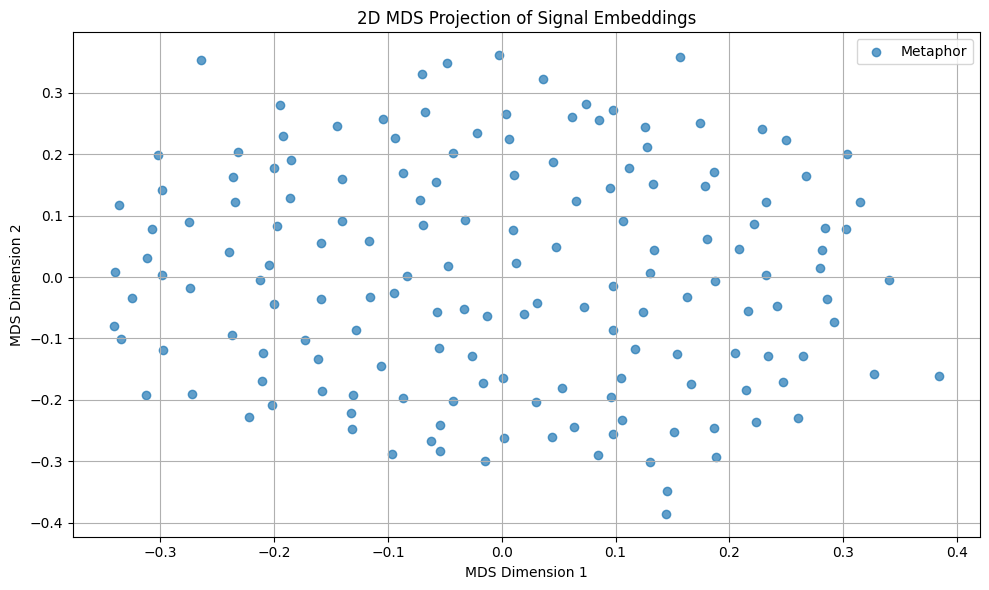

In [9]:
import json
import matplotlib.pyplot as plt

def load_embeddings(path):
    with open(path, 'r') as f:
        return json.load(f)

# Load data
sensory = load_embeddings('sensory_mds.json')
emotional = load_embeddings('emotional_mds.json')
metaphor = load_embeddings('metaphor_mds.json')

# Extract x and y
def extract_xy(data):
    x = [point[0] for point in data]
    y = [point[1] for point in data]
    return x, y

sensory_x, sensory_y = extract_xy(sensory)
emotional_x, emotional_y = extract_xy(emotional)
metaphor_x, metaphor_y = extract_xy(metaphor)

# Plot
plt.figure(figsize=(10, 6))
#plt.scatter(sensory_x, sensory_y, label='Sensory', alpha=0.7)
#plt.scatter(emotional_x, emotional_y, label='Emotional', alpha=0.7)
plt.scatter(metaphor_x, metaphor_y, label='Metaphor', alpha=0.7)

plt.title("2D MDS Projection of Signal Embeddings")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
import json
#generate links for d3 force

with open('./clustered_output.json', 'r') as f:
    clustered_output = json.load(f)

groups_sensory = []
groups_emotional = []
groups_associative = []

for phrase in clustered_output['sensory']:
    groups_sensory.append({
        'id': phrase['phrase'],
        'group': phrase['cluster']
    })

for phrase in clustered_output['emotional']:
    groups_emotional.append({
        'id': phrase['phrase'],
        'group': phrase['cluster']
    })

for phrase in clustered_output['associative']:
    groups_associative.append({
        'id': phrase['phrase'],
        'group': phrase['cluster']
    })

links_sensory = []
links_emotional = []
links_associative = []

for sensory_link in groups_sensory:
    for link2 in groups_sensory:
        if link2['id'] != sensory_link['id']:
            if link2['group'] != -1 and link2['group'] == sensory_link['group']:
                links_sensory.append({
                    'source': sensory_link['id'],
                    'target': link2['id'],
                    'value': 1
                })

for emotional_link in groups_emotional:
    for link2 in groups_emotional:
        if link2['id'] != emotional_link['id']:
            if link2['group'] != -1 and link2['group'] == emotional_link['group']:
                links_emotional.append({
                    'source': emotional_link['id'],
                    'target': link2['id'],
                    'value': 1
                })

for metaphor_link in groups_associative:
    for link2 in groups_associative:
        if link2['id'] != metaphor_link['id']:
            if link2['group'] != -1 and link2['group'] == metaphor_link['group']:
                links_associative.append({
                    'source': metaphor_link['id'],
                    'target': link2['id'],
                    'value': 1
                })

with open('links_sensory.json', 'w') as f:
    json.dump(links_sensory, f, indent=4)

with open('links_emotional.json', 'w') as f:
    json.dump(links_emotional, f, indent=4)

with open('links_associative.json', 'w') as f:
    json.dump(links_associative, f, indent=4)
